In [3]:
#import data
import numpy as np
DATA_FILENAME = 'GCM_Total.csv'
arr = np.genfromtxt(fname=DATA_FILENAME, delimiter='|', skip_header=1, dtype=float)
arr = arr[:, ~np.isnan(arr).any(axis=0)]
arr = np.transpose(arr)

In [4]:
# import classes
with open(DATA_FILENAME, 'r') as f:
    first_line = f.readline().strip().split('|')
set(first_line)
classes = [tuple(filter(None, cls.split('_')[0:3])) for cls in list(filter(None, first_line))]

# Normal is one class
classes = [cls if cls[0] == "Tumor" else ("Normal",'') for cls in classes]

In [5]:
def integerize(array):
    numDict = {}
    result = []
    for item in array:
        if item not in numDict:
            numDict[item] = len(numDict.keys())
        result.append(numDict[item])
    return result


In [6]:
# checking class counts
counter = 0
for cls in set(classes):
    counter += classes.count(cls)
    print(cls, classes.count(cls))

('Tumor', 'CNS') 20
('Tumor', 'Lung') 11
('Normal', '') 90
('Tumor', 'Breast') 11
('Tumor', 'Lymphoma') 22
('Tumor', 'Colorectal') 11
('Tumor', 'Leukemia') 30
('Tumor', 'Pancreas') 11
('Tumor', 'Ovary') 11
('Tumor', 'Mesothelioma') 11
('Tumor', 'Renal') 11
('Tumor', 'Melanoma') 10
('Tumor', 'Uterus') 10
('Tumor', 'Prostate') 10
('Tumor', 'Bladder') 11


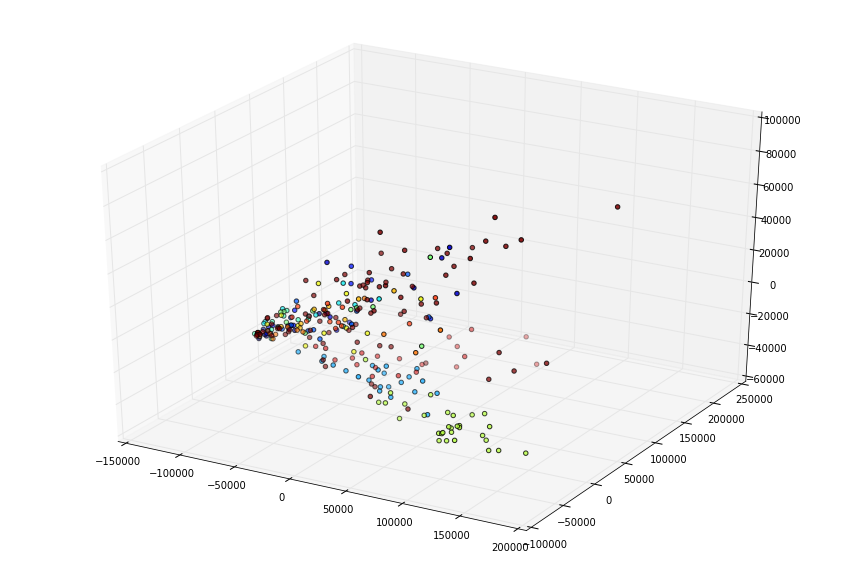

3

In [34]:
from sklearn.decomposition import PCA
#import matplotlib
#matplotlib.use('Gtk3Agg')
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D as plt3d

# pca = PCA(n_components=2)
pca = PCA(n_components=3)
X = pca.fit(arr).transform(arr)

fig = plt.figure(dpi=1000, figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=integerize(classes))
plt.show()

len(pca.explained_variance_ratio_)

In [51]:
# devide data into training and testing
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,integerize(classes),
                                                                     test_size=0.15, random_state=0)
set(y_test)

{0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14}

In [ ]:
from sklearn import svm
#clf = svm.SVC(kernel='sigmoid')
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [50]:
X.shape

(280, 3)